Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import dataset

In [2]:
data = pd.read_csv('basic1.csv')
data = data.iloc[:, :-1]
print(data)

               x           y
0      79.408289  152.834424
1      98.046263  186.910700
2     240.578979   48.473684
3     109.687183  277.945769
4     249.626082  229.753352
...          ...         ...
9789  271.341817  152.122986
9790  374.928092  424.480854
9791  496.467434  317.553201
9792  484.710737  251.504081
9793  358.131243  445.470938

[9794 rows x 2 columns]


In [3]:
x = data.values
print(x)

[[ 79.40828883 152.83442383]
 [ 98.04626263 186.91070045]
 [240.57897871  48.4736839 ]
 ...
 [496.46743444 317.55320113]
 [484.71073733 251.50408061]
 [358.1312425  445.47093816]]


Use the Elbow method to find the optimal number of clusters

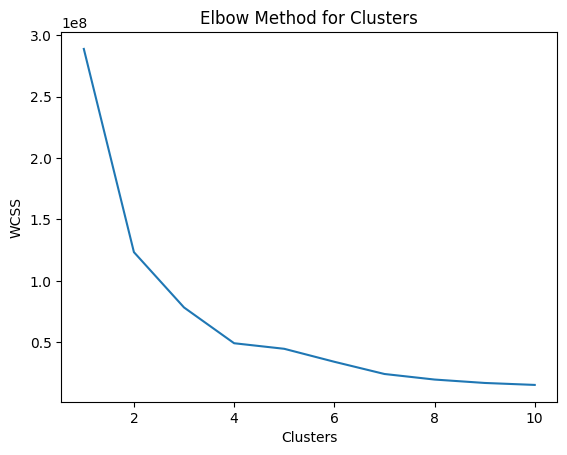

In [4]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Train the K-Means model for 4 Clusters

In [5]:
k_means = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_groups = k_means.fit_predict(x)
print(y_groups)

[1 1 0 ... 3 3 2]


Plot the K-Means Cluster for Basic_1 Dataset

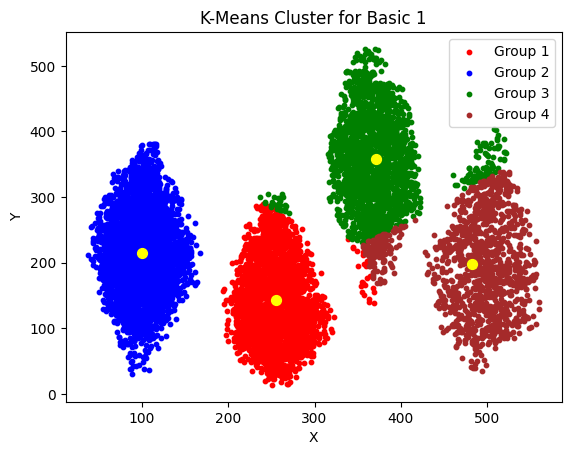

In [6]:
plt.scatter(x[y_groups == 0, 0], x[y_groups == 0, 1], s = 10, color = 'red', label = 'Group 1')
plt.scatter(x[y_groups == 1, 0], x[y_groups == 1, 1], s = 10, color = 'blue', label = 'Group 2')
plt.scatter(x[y_groups == 2, 0], x[y_groups == 2, 1], s = 10, color = 'green', label = 'Group 3')
plt.scatter(x[y_groups == 3, 0], x[y_groups == 3, 1], s = 10, color = 'brown', label = 'Group 4')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 50, color = 'yellow' )
plt.title('K-Means Cluster for Basic 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Hierarchical Clustering

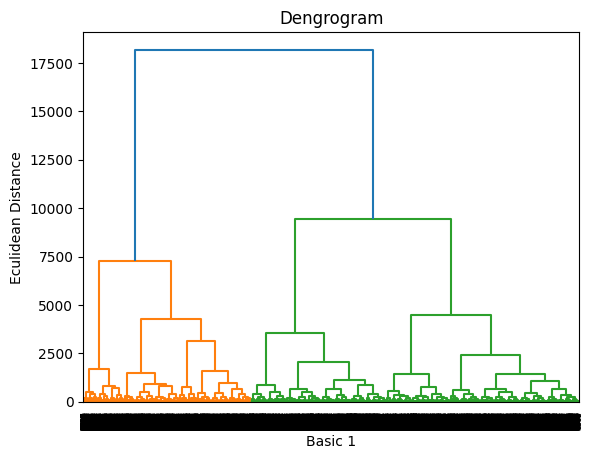

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dengrogram')
plt.xlabel('Basic 1')
plt.ylabel('Eculidean Distance')
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering
hr = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
y_group2 = hr.fit_predict(x)
print(y_group2)

[0 0 2 ... 1 1 1]


Plot the Hierarchical Clustering Model

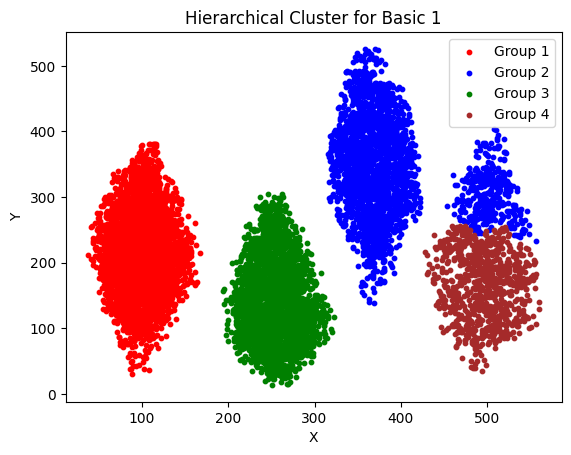

In [9]:
plt.scatter(x[y_group2 == 0, 0], x[y_group2 == 0, 1], s = 10, color = 'red', label = 'Group 1')
plt.scatter(x[y_group2 == 1, 0], x[y_group2 == 1, 1], s = 10, color = 'blue', label = 'Group 2')
plt.scatter(x[y_group2 == 2, 0], x[y_group2 == 2, 1], s = 10, color = 'green', label = 'Group 3')
plt.scatter(x[y_group2 == 3, 0], x[y_group2 == 3, 1], s = 10, color = 'brown', label = 'Group 4')
plt.title('Hierarchical Cluster for Basic 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()